## This is some rough pseudo code for algorithm ideas I have for my Master's research work.

### Three main algorithms-rough structure/package implementation ideas for each.

In [1]:
#import relevant packages
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score #(?)
import matplotlib.pyplot as plt
import pandas as pd

# Pre-processing the data

In [ ]:
#load in the data
#assuming a set of spectra can be represented in the form of a pd dataframe
    #where each row is a spectrum, each column is a flux value.

df = #load data here

In [ ]:
#apply some kind of standardization across the fluxes?
scaler = StandardScaler
df = scaler.fit_transform(df)

X = df

# Algorithm 1: "Basic" Clustering


A basic agglomerative clustering algorithm.

- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- deploy optimal clustering algorithm
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc

In [ ]:
# explore the appropriate number of clusters to use
n_cluster_range = [4,6,8,10,15] #a range of clusters to explore

for n_cluster in n_cluster_range:
    # initialize the clusterer with n_clusters and a random_seed for reproducability
    clusterer = AgglomerativeClustering(n_clusters = n_clusters) #or AgglomerativeClustering(n_clusters, random_seed)
    # generate cluster labels
    cluster_labels = clusterer.fit_predict(X)
    
    #calculate silhouette scores
    
    #generate silhouette plot
        # see code in CS4414B/Assignment_Week11-Clean
        

optimal_clusters = # analyze silhouette plot for the optimal number of clusters.
    

In [1]:
# perform PCA on data in order to retreive parameter-space dimensions
pca = PCA(n_components = 2) # use 2 from Ameek's paper- could also experiment with others...
X_pca = pca.fit_transform(X)

#apply clustering algorithm with chosen number of clusters and plot results

#initialize the figure
fig, axs = plt.subplots(1,1)

clusterer = #the chosen clustering algorithm
cluster_labels = clusterer.fit_predict(X)

#plot in pc space, color-code by cluster
for i in range(optimal_clusters):
    color = cm.nipy_spectral(float(i) / optimal_clusters)
    plt.scatter(X_pca[cluster_labels==i, 0], X_pca[cluster_labels==i, 1], 
                label='Cluster %i' % (i+1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA-transformed plot for %i clusters' % n_clusters)
plt.legend()


SyntaxError: invalid syntax (<ipython-input-1-545c4191689a>, line 10)

# Algorithm 2 : "Enhanced Clustering 1"

Agglomerative clustering algorithm except the output is passed as input to KMeans clustering to serve as initial centroid positions.
- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- deploy agglomerative clustering with optimal number of clusters
- deploy KMeans clustering with K=optimal_number_of_cluster and initialize positions at output from agglomerative clustering algorithm
- sanity check- (re-?)calculate silhouette score for clusters and compare with agglomerative partitions
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc

In [3]:
##just playing around with some toy data to experiment with how to consolidate
#using the output labels from agglomerative clustering as input to kmeans
X=pd.read_csv("RFM_data.csv")
clusterer= AgglomerativeClustering(n_clusters=5)
cluster_labels= clusterer.fit_predict(X)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
print(clusterer.labels_.shape)
print(X_pca.shape)

(1000,)
(1000, 2)


In [18]:
#now pass the output cluster centroids from Agglomerative Clustering to the KMeans algorithm

#start by computing the centroid positions
from sklearn.neighbors import NearestCentroid
import numpy as np

clf=NearestCentroid()
clf.fit(X_pca, cluster_labels) #do you pass the PCA transformed data set as input here or the original?
centroids=clf.centroids_
print(centroids.shape)

(5, 2)


In [19]:
#now pass the centroids as starting positions for the KMeans algo
clusterer = KMeans(n_clusters=5, random_state=10, init=centroids)
cluster_labels = clusterer.fit_predict(X_pca)

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [22]:
print(centroids)

[[-2044.14187519  -313.55726279]
 [-2404.39108562  -662.96555671]
 [ -951.00273733  2134.94196015]
 [10924.88451545  -286.15685926]
 [11070.98851542   -29.68925063]]


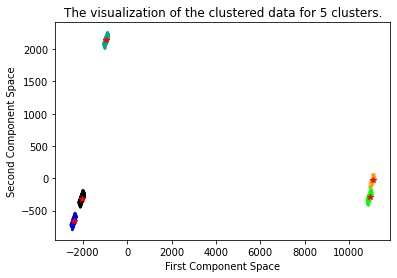

In [23]:
import matplotlib.cm as cm
fig, axs=plt.subplots(1,1)
colors = cm.nipy_spectral(cluster_labels.astype(float) / 5)
axs.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
axs.set_xlabel("First Component Space")
axs.set_ylabel("Second Component Space")
axs.set_title("The visualization of the clustered data for "+ str(5)+" clusters.")
plt.plot(centroids[:,0], centroids[:,1], "*", color='red')
plt.show()



In [24]:
#playing with centroid calculation
from sklearn.neighbors import NearestCentroid
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = NearestCentroid()
centroids=clf.fit(X, y).centroids_

# print(clf.centroids_)
print(centroids)
# [[-2.         -1.33333333]
#  [ 2.          1.33333333]]



[[-2.         -1.33333333]
 [ 2.          1.33333333]]


[-1.33333333  1.33333333]


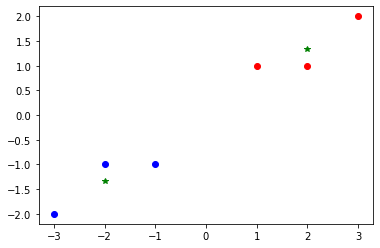

In [31]:
x_coords=X[:,0]
y_coords=X[:,1]

#plot the points themselves
plt.plot(x_coords[0:3], y_coords[0:3], 'o',color='blue')
plt.plot(x_coords[3:], y_coords[3:], 'o', color='red' )

#plot the centroids
x_cent=clf.centroids_[:,0]
y_cent=clf.centroids_[:,1]

print(y_cent)

plt.plot(x_cent, y_cent, '*', color='green')
plt.show()

# Algorithm 3: "Enhanced Clustering 2"

Agglomerative clustering based on input from a computed RF dissimilarity score (Euclidean analog)
- determine the optimal number of clusters using either a silhouette score or dendrogram visualization
- generate a synthetic "dataset" based on marginal distributions of real data, apply labels to both sets
- train RFClassifier on both sets (real=1)
- calculate similarity score->dissimilarity score
- pass dissimilarity to input of MDS algo
- deploy agglomerative clustering with MDS result as input (??have to look more into this specific step/implementation)
- apply a PCA decomp to retrieve feature space
- visualize results
- analyze key features of average spectra in each cluster- groupby, plots of each averaged spectra, etc

In [2]:
##start by sampling from the marginal distributions of each variable and creating the synthetic distributions

#each wavelength is an "independent"(?) feature and we operate under the assumption that each feature is normally distributed
#extract the mean and std from each wavelength feature
from spec_build import *
from pre_processing import *

#load in and reshape all wavelength, extinction, spectral maps
spectra, wave= load_spec_wavelength("NGC2023_SPECTRAL_MAP_SOUTH.fits")

#load in and reshape continuum and corresponding wavelentgh arrays
cont, wave_cont=load_continuum("NGC2023_CONTINUUM_MAP_SOUTH.fits")

#load in and reshape the extinction maps and corresponding wavelength array
ext, wave_ext=load_extinction("NGC2023_EXTINCTION_MAPS_SOUTH.fits")

#extinction correct the spectra
ext_corr_spec=extinction_correct(ext, spectra)

#pre-processing

#transform the map(s) from 3 to 2-dimensional array(s and consolidate)
df=df_create(ext_corr_spec)
print(df.mean(axis=0))

# #apply z-standardization to the spectra
# df=standardize(df)
# print(df.mean(axis=0))

#experimenting with applying normalization to the spectra instead of standardization!!!
from sklearn.preprocessing import normalize
df=normalize(df)

[ 41.43939397  36.55662503  31.17130165  27.76410135  25.95031781
  27.46250496  27.67302789  30.81909803  35.56006756  39.16886061
  40.94213242  45.3963704   54.33698732  62.31862681  66.49218513
  69.95662904  69.2652982   66.7019802   65.62507019  68.17744727
  74.37109348  79.03396123  79.71228927  86.50138342 102.72218542
 120.73702066 134.47951293 147.98973535 173.68511368 244.86217055
 363.25173999 464.44825667 468.30941348 405.33512772 332.27372068
 272.69636898 230.74772068 203.328595   182.18577327 162.14959163
 149.37373661 139.3306507  132.61684236 134.61442948 143.07048769
 149.37254418 149.0439378  150.50986565 149.18368394 150.92089109
 151.66883995 154.41226341 158.76444831 170.57588477 175.6000314
 165.54147371 159.46861307 162.16096103 169.59685537 181.2563501
 189.94868717 202.80340504 217.14137282 230.15915067 246.1105603
 267.96540314 292.58859612 315.23091994 343.10860126 377.37104836
 413.23143641 444.8482381  476.43440915 516.65741839 556.34113788
 561.68968446

In [3]:
#create an array to store the mean and std for each wavelength
# stats=np.zeros((2,df.shape[1])) #2 rows, as many columns as wavelength values

#calculate the stats on each wavelength
means=df.mean(axis=0) #the means
stds=df.std(axis=0) #the standard deviations


In [4]:
#now create the synthetic dataset the same shape as df
df_synthetic=np.zeros((df.shape))#an empty array to hold the synthetic data
sample_size=df.shape[0]
for i in range(df.shape[1]): #iterate for each wavelength value
    #create the synthetic sample and fill in the empty array appropriately
    df_synthetic[:,i]=np.random.normal(means[i], stds[i], sample_size)
print(df_synthetic.shape)

(459, 194)


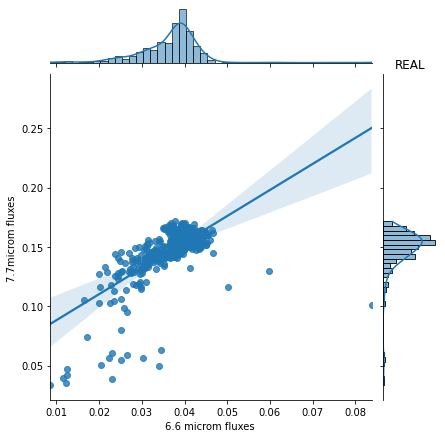

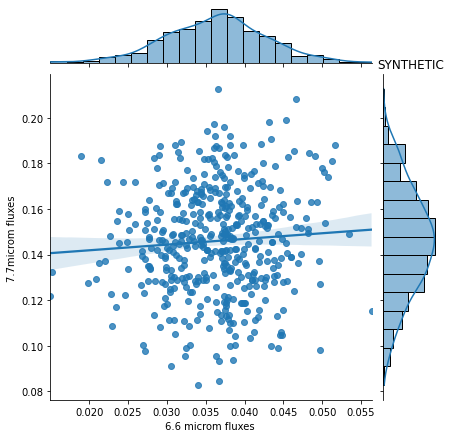

In [6]:
#now lets plot the flux values for two wavelengths which are known to be correlated in both
#the synthetic and real datasets to test the marginal distributions/correlation
import seaborn as sns
import matplotlib.pyplot as plt

#i choose to plot the 6.2 and 7.7 micrometer fluxes
#find out the indices of these features
idx_66=np.where(wave==6.606173) #copy/pasted these values by printing and selecting by eye
# print(wave[idx_66]) 

idx_77=np.where(wave==7.719988)
# print(wave[idx_77])

feature_66_real=df[:,idx_66]
feature_77_real=df[:,idx_77]

#plot the real features
axis=sns.jointplot(x=feature_66_real[:,0,0], y=feature_77_real[:,0,0], kind="reg")
axis.set_axis_labels('6.6 microm fluxes ', '7.7microm fluxes ')
# axis.ax_marg_x.set_xlim(-10,20) #adjust the axes to make sure that the scales are comparable
# axis.ax_marg_y.set_ylim(-5, 21)
plt.title("REAL")
plt.show()


#now plot the "synthetic" features- they have the same index as in the original array!
feature_66_syn=df_synthetic[:,idx_66]
feature_77_syn=df_synthetic[:,idx_77]

axis=sns.jointplot(x=feature_66_syn[:,0,0], y=feature_77_syn[:,0,0], kind='reg')
axis.set_axis_labels('6.6 microm fluxes ', '7.7microm fluxes ')
# axis.ax_marg_x.set_xlim(-10,20) #adjust the axes to make sure that the scales are comparable
# axis.ax_marg_y.set_ylim(-5, 21)
plt.title("SYNTHETIC")
plt.show()


In [6]:
##SOFIA- looks like the original distribution is not quite normal...
#going to check skew/kurtosis just out of curiosity

from scipy.stats import skew, kurtosis
skew_66_real=skew(feature_66_real)
kurt_66_real=kurtosis(feature_66_real)

print(skew_66_real, kurt_66_real)

[[6.52903375]] [[72.10073612]]


In [7]:
##SOFIA-I think the move for now is to try out normalization (instead of standardization w
#StandardScaler) and then re-do the whole sampling business above and see how that works..
#I think the focus right now is getting something written for the code!...

In [7]:
#now to train a Random Forest Classifier on the real and synthetic datasets (real=1)
from sklearn.ensemble import RandomForestClassifier


#NOTE TO SOFIA- going to have to tune the number of estimators!

#create the training and testing datasets
#start by adding a row to the real/synthetic arrays that has the labels
labels_real=np.ones((df[:,0].shape)) #create the labels as individual columns
labels_syn=np.zeros((df[:,0].shape))
df=np.c_[df,labels_real] #adding the labels to their respective datasets as columns
df_synthetic=np.c_[df_synthetic, labels_syn]
print(df_synthetic.shape)


(459, 195)


In [8]:
#make sure to re-run the kernel after running the above cell multiple times as the arrays could have been edited multiple times!!
#combine the two datasets to one large one 
df_whole=np.vstack((df, df_synthetic))
print(df_whole.shape)

X=df_whole[:,0:-1]
y=df_whole[:,-1]

# print(X.shape)
# print(y.shape)
# print(y)

#now do a 70, 30 train/test split with shuffle=True (since labels are ordered in the design matrix)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #check the arrays each have the right proportions

(918, 195)
(642, 194) (642,) (276, 194) (276,)


In [9]:
#now initialize the classifier, fit and predict!
model=RandomForestClassifier()#SOFIA- come back and tune parameters afterwards!
model.fit(X_train, y_train) #train
y_pred=model.predict(X_test) #test


In [11]:
#now just some rough code to see how the model did
#define a function to compute some statistics on the regression performed
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
compute_performance(y_pred,y_test, model.classes_)
print(model.classes_.shape)

tp: 143 tn: 132 fp: 0 fn: 1
Accuracy: 0.996 Recall: 0.993 Precision: 1.0 Sensitivity: 0.993 Specificity: 1.0
(2,)


In [12]:
#now computing the similarity/proximity matrix
def similarity_matrix(model, X, normalize=True):
    
    terminals=model.apply(X)# apply the trees in the forest to X and return the indices of the leaves that each x in X end up in
    #terminals is matrix with number of rows same as X and onr column for each tree
    n_trees=terminals.shape[1]# the number of trees in the forest
    
    sim_matrix=np.zeros((terminals.shape[0], terminals.shape[0])) # create the empty matrix
    
    for i in range(0, n_trees): #iterate through each tree in the forest, fill in the matrix
        a=terminals[:,i] #grab each of the "similarity vectors"
        sim_matrix+=1*np.equal.outer(a,a) #add to the similarity matrix (ie element-wise addition of scores)
        
    if normalize: #is set to True (by default, yes)
        sim_matrix=sim_matrix/n_trees #divide each element by the number of trees in the forest to normalize the scores to be from 0 to 1
        
    return sim_matrix #return the computed similarity matrix
        

In [13]:
#lets test out the similarity matrix function...
sim_m=similarity_matrix(model, X_train, normalize=True)

In [14]:
print(sim_m)

[[1.   1.   1.   ... 0.01 0.   0.04]
 [1.   1.   1.   ... 0.01 0.   0.04]
 [1.   1.   1.   ... 0.01 0.   0.04]
 ...
 [0.01 0.01 0.01 ... 1.   0.29 0.32]
 [0.   0.   0.   ... 0.29 1.   0.23]
 [0.04 0.04 0.04 ... 0.32 0.23 1.  ]]


In [15]:
print(sim_m.shape)
print(X_train.shape)

(642, 642)
(642, 194)


In [16]:
#define a function that computes the dissimilarity matrix of a given similarity matrix s
from scipy.linalg import sqrtm
def dissimilarity_matrix(s):
    ##SOFIA- is it d= sqrt(1-s) or just d=1-s???
    
    #first compute the matrix that is 1-s (recall: s is a square matrix)
    d=np.zeros((s.shape))
    for i in range(s.shape[0]): #along the first axis
        for j in range(s.shape[0]): #along the second axis
            d[i,j]=1-s[i,j] # fill in the dissimilarity matrix-each element is 1 minus the element value in s
            
    #SOFIA- commenting this part out for now- only works for positive matrices, returning a matrix with imaginary elements
    #now compute the square root to get the Euclidean distance?...
    #d=sqrtm(s) 
    
    #return the dissimilarity matrix
    return d
    
    

In [17]:
#now test out the dissimilarity matrix function
dis_matrix=dissimilarity_matrix(sim_m)
print(dis_matrix)
print(dis_matrix.shape)

[[0.   0.   0.   ... 0.99 1.   0.96]
 [0.   0.   0.   ... 0.99 1.   0.96]
 [0.   0.   0.   ... 0.99 1.   0.96]
 ...
 [0.99 0.99 0.99 ... 0.   0.71 0.68]
 [1.   1.   1.   ... 0.71 0.   0.77]
 [0.96 0.96 0.96 ... 0.68 0.77 0.  ]]
(642, 642)


In [18]:
#now start the MDS
from sklearn.manifold import MDS
mds=MDS(n_components=2, dissimilarity="precomputed")
embedding=mds.fit_transform(dis_matrix)
print(embedding.shape)

(642, 2)


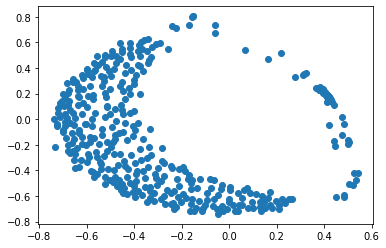

In [19]:
#lets just plot the embeddings and see what the data looks like- not really sure what to look for...
plt.scatter(embedding[:,0], embedding[:,1])
plt.show()

In [33]:
#now passing the embeddings from the MDS to Agglomerative clustering
optimal_n_clusters=2 #setting to 3 for now
#SOFIA- remember to add in part of code in which the optimal number of clusters is determined
#should determine the best number of clusters based on the MDS embeddings, since this is the data that will be passed to the clustering algo
clusterer=AgglomerativeClustering(n_clusters=optimal_n_clusters)
results= clusterer.fit_predict(embedding)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

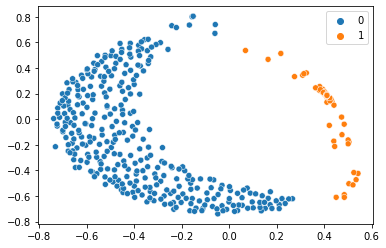

In [34]:
#now plot the embeddings with color codes according to the cluster labels
# import matplotlib.cm as cm
# colors = cm.nipy_spectral(results.astype(float) / optimal_n_clusters)
# plt.plot(embedding[:,0], embedding[:,1], c=results)
# plt.show()

sns.scatterplot(embedding[:,0], embedding[:,1], hue=results)
# print(embedding[:,0].shape, embedding[:,1].shape, results.shape)

(642, 2)


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


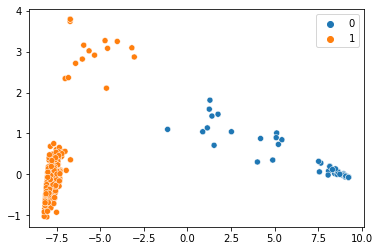

In [38]:
##just out of curiosity lets now just pass the similarity matrix from the RF business to the Agglomerative clustering algorithm and see what happens
results2=clusterer.fit_predict(sim_m)
#reduce the similarity matrix to 2D?
pca=PCA(n_components=2)
sim_PCA=pca.fit_transform(sim_m)
print(sim_PCA.shape)

#now plot, color-code by clusters
sns.scatterplot(sim_PCA[:,0], sim_PCA[:,1], hue=results2)
plt.show()

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


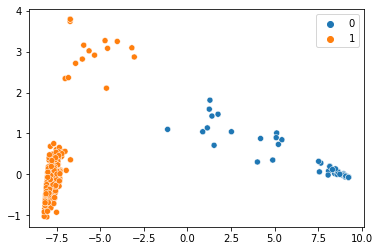

In [39]:
#hmmm thats kind of weird actually, should I have done the PCA on the matrix before-hand?
results2=clusterer.fit_predict(sim_PCA)
sns.scatterplot(sim_PCA[:,0], sim_PCA[:,1], hue=results2)
plt.show()

In [ ]:
##hmmmmm you get the same thing....... first i cluster on the matrix, then decomp and plot w the labels
#second I decomp and cluster on the decomp, then plot w the labels... I guess the clustering/PCA operations commute

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


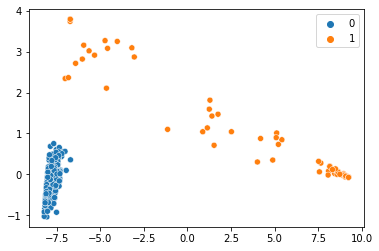

In [44]:
##now lets try passing the distance matrix and see...
clusterer_distance=AgglomerativeClustering(affinity="precomputed", linkage='single')# can play with the best/most appropriate linkage after
results3=clusterer_distance.fit_predict(dis_matrix)
dis_PCA=pca.fit_transform(dis_matrix)
sns.scatterplot(dis_PCA[:,0], dis_PCA[:,1], hue=results3)
plt.show()

In [ ]:
#I guess it makes sense that there would not be a difference in the PCA decomp of the similarity vs
#dissimilarity matrices- they are inverses- the "distances" are preserved!

In [37]:
#just out of curiosity going to play with using MDS on the entire data set and compare w the PCA results

#load in and reshape all wavelength, extinction, spectral maps
spectra, wave= load_spec_wavelength("NGC2023_SPECTRAL_MAP_SOUTH.fits")

#load in and reshape continuum and corresponding wavelentgh arrays
cont, wave_cont=load_continuum("NGC2023_CONTINUUM_MAP_SOUTH.fits")

#load in and reshape the extinction maps and corresponding wavelength array
ext, wave_ext=load_extinction("NGC2023_EXTINCTION_MAPS_SOUTH.fits")

#extinction correct the spectra
ext_corr_spec=extinction_correct(ext, spectra)

#pre-processing

#transform the map(s) from 3 to 2-dimensional array(s and consolidate)
df=df_create(ext_corr_spec)
# print(df.mean(axis=0))

#apply z-standardization to the spectra
df=standardize(df)
# print(df.mean(axis=0))

print(df.shape)

mds2=MDS()#the default dissimilarity setting is Euclidean anyways
embedding_2=mds2.fit_transform(df)# passing the entire "real" data set (just standardized)
print(embedding_2.shape)

(459, 194)
(459, 2)


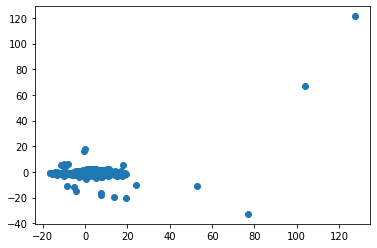

In [39]:
plt.scatter(embedding_2[:,0], embedding_2[:,1])
plt.show()


In [ ]:
#this is very interesting...not the same shape when you pass the dataset to the MDS algo
#vs when you pass the computed dissimilarity matrix as input to the MDS algo... I wonder what 
#just usual PCA decomp looks like on the spectra and then compare with the MDS decomp...
#compare both with clustering as well and color-code to see??....

In [12]:
def test_function(a,b):
    c=a+1
    d=b+1
    return c,d


c,d=test_function(2,4)
print(c,d)

3 5
